In [1]:
# Importing Required Libraries

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import random
import os
import matplotlib.cm as cm
%matplotlib inline
import datetime

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

from sklearn .model_selection import train_test_split
from sklearn.metrics import accuracy_score
    

# Exploratory Data Analysis

In [2]:
# Load the data into the data frame.

train_data=pd.read_csv(r'train_time_series.csv')
train_label=pd.read_csv(r'train_labels.csv')

In [3]:
# top 5 rows of train_time_series
train_data.head()

,Unnamed: 0,timestamp,UTC time,accuracy,x,y,z
0,20586,1565109930787,2019-08-06T16:45:30.787,unknown,-0.006485,-0.934860,-0.069046
1,20587,1565109930887,2019-08-06T16:45:30.887,unknown,-0.066467,-1.015442,0.089554
2,20588,1565109930987,2019-08-06T16:45:30.987,unknown,-0.043488,-1.021255,0.178467
3,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985
4,20590,1565109931188,2019-08-06T16:45:31.188,unknown,-0.054031,-1.003616,0.126450


In [4]:
# top 5 rows of train labels
train_label.head()

,Unnamed: 0,timestamp,UTC time,label
0,20589,1565109931087,2019-08-06T16:45:31.087,1
1,20599,1565109932090,2019-08-06T16:45:32.090,1
2,20609,1565109933092,2019-08-06T16:45:33.092,1
3,20619,1565109934094,2019-08-06T16:45:34.094,1
4,20629,1565109935097,2019-08-06T16:45:35.097,1


In [5]:
# join two datasets based on common index level column using timestamp

training_data_label = pd.merge(train_data[['timestamp','x','y','z']],train_label,how='inner',on='timestamp')

In [6]:
# list of columns  
print(training_data_label.columns)

Index(['timestamp', 'x', 'y', 'z', 'Unnamed: 0', 'UTC time', 'label'], dtype='object')


In [7]:
# Rename column name 

training_data_label.columns=['timestamp', 'x', 'y', 'z', 'Key', 'date_time', 'label']

In [8]:
# top 5 rows of joined dataset
training_data_label.head()

,timestamp,x,y,z,Key,date_time,label
0,1565109931087,-0.053802,-0.987701,0.068985,20589,2019-08-06T16:45:31.087,1
1,1565109932090,0.013718,-0.852371,-0.000870,20599,2019-08-06T16:45:32.090,1
2,1565109933092,0.145584,-1.007843,-0.036819,20609,2019-08-06T16:45:33.092,1
3,1565109934094,-0.099380,-1.209686,0.304489,20619,2019-08-06T16:45:34.094,1
4,1565109935097,0.082794,-1.001434,-0.025375,20629,2019-08-06T16:45:35.097,1


In [9]:
# last 5 rows of joined dataset
training_data_label.tail()

,timestamp,x,y,z,Key,date_time,label
370,1565110302030,-0.641953,-1.469177,0.301041,24289,2019-08-06T16:51:42.030,4
371,1565110303032,-0.171616,-0.366074,-0.059082,24299,2019-08-06T16:51:43.032,4
372,1565110304034,0.401810,-1.077698,0.258911,24309,2019-08-06T16:51:44.034,4
373,1565110305037,0.330338,-1.470062,0.303894,24319,2019-08-06T16:51:45.037,4
374,1565110306039,0.689346,-0.991043,0.034973,24329,2019-08-06T16:51:46.039,4


In [10]:
# Check the types of data

training_data_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  375 non-null    int64  
 1   x          375 non-null    float64
 2   y          375 non-null    float64
 3   z          375 non-null    float64
 4   Key        375 non-null    int64  
 5   date_time  375 non-null    object 
 6   label      375 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 23.4+ KB


In [11]:
# Rows containing duplicate data

dupli_rows_df = training_data_label[training_data_label.duplicated()]
print("number of duplicate rows: ", dupli_rows_df.shape)

number of duplicate rows:  (0, 7)


In [12]:
# how many nulls in each column
training_data_label.isna().sum()

timestamp    0
x            0
y            0
z            0
Key          0
date_time    0
label        0
dtype: int64

In [13]:
# no.of rows and columns in  dataset
training_data_label.shape

(375, 7)

In [14]:
# categorical data= qualitative 
# category of label

training_data_label["label"].unique()

array([1, 2, 4, 3], dtype=int64)

In [15]:
# total no.of values/rows for each label

count_of_each_activity = training_data_label["label"].value_counts()
print(count_of_each_activity)


2    213
3     88
4     47
1     27
Name: label, dtype: int64


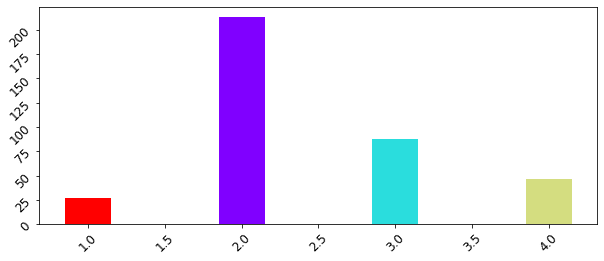

In [16]:
colors = cm.rainbow(np.linspace(0, 1, 4))
plt.figure(figsize=(10,4))
plt.bar(count_of_each_activity.index,count_of_each_activity,width=0.3,color=colors)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(rotation=45,fontsize=12)
plt.show()

In [17]:
# date time converted to date and time 
training_data_label["Date_time"]=pd.to_datetime(training_data_label["date_time"])

In [18]:
training_data_label["Date_time"]

0     2019-08-06 16:45:31.087
1     2019-08-06 16:45:32.090
2     2019-08-06 16:45:33.092
3     2019-08-06 16:45:34.094
4     2019-08-06 16:45:35.097
                ...          
370   2019-08-06 16:51:42.030
371   2019-08-06 16:51:43.032
372   2019-08-06 16:51:44.034
373   2019-08-06 16:51:45.037
374   2019-08-06 16:51:46.039
Name: Date_time, Length: 375, dtype: datetime64[ns]

In [19]:
# Description of each numeric column
training_data_label.describe()

,timestamp,x,y,z,Key,label
count,3.750000e+02,375.000000,375.000000,375.000000,375.000000,375.000000
mean,1.565110e+12,0.214254,-1.009747,0.092230,22459.000000,2.413333
std,1.086802e+05,0.391877,0.457594,0.352037,1083.974169,0.799287
min,1.565110e+12,-0.863419,-2.919434,-1.248840,20589.000000,1.000000
25%,1.565110e+12,0.014862,-1.152794,-0.061554,21524.000000,2.000000
50%,1.565110e+12,0.203979,-0.954330,0.058731,22459.000000,2.000000
75%,1.565110e+12,0.428375,-0.769676,0.216187,23394.000000,3.000000
max,1.565110e+12,1.785187,0.321747,1.741806,24329.000000,4.000000


# Training the model

In [20]:
classification_target = 'label'
all_covariates = ['x','y','z']

In [28]:
# Get X as covariates and y as label for training data
X = training_data_label[all_covariates]
target = training_data_label["label"]

In [27]:
training_data_label.head()

,timestamp,x,y,z,Key,date_time,label,Date_time
0,1565109931087,-0.053802,-0.987701,0.068985,20589,2019-08-06T16:45:31.087,1,2019-08-06 16:45:31.087
1,1565109932090,0.013718,-0.852371,-0.000870,20599,2019-08-06T16:45:32.090,1,2019-08-06 16:45:32.090
2,1565109933092,0.145584,-1.007843,-0.036819,20609,2019-08-06T16:45:33.092,1,2019-08-06 16:45:33.092
3,1565109934094,-0.099380,-1.209686,0.304489,20619,2019-08-06T16:45:34.094,1,2019-08-06 16:45:34.094
4,1565109935097,0.082794,-1.001434,-0.025375,20629,2019-08-06T16:45:35.097,1,2019-08-06 16:45:35.097


In [29]:
print(X.shape , y.shape)

(375, 3) (375,)


In [30]:
print(X_train.shape , X_test.shape)

(300, 3) (75, 3)


In [39]:
# label_classify function contains the classifier names and its object instantiation list

#def label_classify(names,classifiers): 

names=["RF","KNN","SVC","NB"]
classifiers=[RandomForestClassifier(n_estimators=81),
             KNeighborsClassifier(n_neighbors=81),
             SVC(),
             GaussianNB()]
#    return names,classifiers

X_train, X_test, y_train, y_test = train_test_split(X, target,test_size = 0.20)
# Fitting the model with covariates and label

for [name,clf] in zip(names,classifiers):
    clf.fit(X_train,y_train)
    acc=clf.score(X_test,y_test)
    print("Classifier",name,"Accuracy:",acc)

Classifier RF Accuracy: 0.5733333333333334
Classifier KNN Accuracy: 0.6
Classifier SVC Accuracy: 0.6
Classifier NB Accuracy: 0.6266666666666667


# Using Testing Dataset

# Training the model

In [24]:

# Load the data into the data frame.

test_data=pd.read_csv(r'test_time_series.csv')
test_label=pd.read_csv(r'test_labels.csv')

In [25]:
# top 5 rows
test_label.head()

,Unnamed: 0,timestamp,UTC time,label
0,24339,1565110307041,2019-08-06T16:51:47.041,NaN
1,24349,1565110308043,2019-08-06T16:51:48.043,NaN
2,24359,1565110309046,2019-08-06T16:51:49.046,NaN
3,24369,1565110310048,2019-08-06T16:51:50.048,NaN
4,24379,1565110311050,2019-08-06T16:51:51.050,NaN


In [26]:
# last 5 rows
test_label.tail()

,Unnamed: 0,timestamp,UTC time,label
120,25539,1565110427366,2019-08-06T16:53:47.366,NaN
121,25549,1565110428369,2019-08-06T16:53:48.369,NaN
122,25559,1565110429371,2019-08-06T16:53:49.371,NaN
123,25569,1565110430373,2019-08-06T16:53:50.373,NaN
124,25579,1565110431376,2019-08-06T16:53:51.376,NaN


In [27]:
test_data.head()

,Unnamed: 0,timestamp,UTC time,accuracy,x,y,z
0,24330,1565110306139,2019-08-06T16:51:46.139,unknown,0.034286,-1.504456,0.157623
1,24331,1565110306239,2019-08-06T16:51:46.239,unknown,0.409164,-1.038544,0.030975
2,24332,1565110306340,2019-08-06T16:51:46.340,unknown,-0.234390,-0.984558,0.124771
3,24333,1565110306440,2019-08-06T16:51:46.440,unknown,0.251114,-0.787003,0.054810
4,24334,1565110306540,2019-08-06T16:51:46.540,unknown,0.109924,-0.169510,0.235550


In [28]:
test_data.tail()

,Unnamed: 0,timestamp,UTC time,accuracy,x,y,z
1245,25575,1565110430975,2019-08-06T16:53:50.975,unknown,0.036499,-0.724823,0.553802
1246,25576,1565110431075,2019-08-06T16:53:51.075,unknown,-0.159241,0.307022,0.142410
1247,25577,1565110431175,2019-08-06T16:53:51.175,unknown,-0.037964,-0.673706,1.065445
1248,25578,1565110431275,2019-08-06T16:53:51.275,unknown,0.255707,-1.485397,-0.013336
1249,25579,1565110431376,2019-08-06T16:53:51.376,unknown,-0.089462,-0.734573,-0.100876


In [29]:
# join two datasets based on common index level column using timestamp

test_data_label = pd.merge(test_data[['timestamp','x','y','z']],test_label,how='inner',on='timestamp')

In [30]:
test_data_label

,timestamp,x,y,z,Unnamed: 0,UTC time,label
0,1565110307041,0.098282,-0.833771,0.118042,24339,2019-08-06T16:51:47.041,NaN
1,1565110308043,0.348465,-0.946701,-0.051041,24349,2019-08-06T16:51:48.043,NaN
2,1565110309046,0.377335,-0.849243,-0.026474,24359,2019-08-06T16:51:49.046,NaN
3,1565110310048,0.110077,-0.520325,0.312714,24369,2019-08-06T16:51:50.048,NaN
4,1565110311050,0.283478,-0.892548,-0.085876,24379,2019-08-06T16:51:51.050,NaN
...,...,...,...,...,...,...,...
120,1565110427366,-0.043915,-0.242416,0.068802,25539,2019-08-06T16:53:47.366,NaN
121,1565110428369,0.118271,-1.212097,0.357468,25549,2019-08-06T16:53:48.369,NaN
122,1565110429371,0.667404,-0.978851,0.171906,25559,2019-08-06T16:53:49.371,NaN
123,1565110430373,0.371384,-1.021927,-0.244446,25569,2019-08-06T16:53:50.373,NaN


In [31]:
# list of columns  
print(test_data_label.columns)

Index(['timestamp', 'x', 'y', 'z', 'Unnamed: 0', 'UTC time', 'label'], dtype='object')


In [32]:
# Rename column name 

test_data_label.columns=['timestamp', 'x', 'y', 'z', 'Key', 'date_time', 'label']

In [33]:
# top 5 rows of joined dataset
test_data_label.head()

,timestamp,x,y,z,Key,date_time,label
0,1565110307041,0.098282,-0.833771,0.118042,24339,2019-08-06T16:51:47.041,NaN
1,1565110308043,0.348465,-0.946701,-0.051041,24349,2019-08-06T16:51:48.043,NaN
2,1565110309046,0.377335,-0.849243,-0.026474,24359,2019-08-06T16:51:49.046,NaN
3,1565110310048,0.110077,-0.520325,0.312714,24369,2019-08-06T16:51:50.048,NaN
4,1565110311050,0.283478,-0.892548,-0.085876,24379,2019-08-06T16:51:51.050,NaN


In [34]:
# last 5 rows of joined dataset
test_data_label.tail()

,timestamp,x,y,z,Key,date_time,label
120,1565110427366,-0.043915,-0.242416,0.068802,25539,2019-08-06T16:53:47.366,NaN
121,1565110428369,0.118271,-1.212097,0.357468,25549,2019-08-06T16:53:48.369,NaN
122,1565110429371,0.667404,-0.978851,0.171906,25559,2019-08-06T16:53:49.371,NaN
123,1565110430373,0.371384,-1.021927,-0.244446,25569,2019-08-06T16:53:50.373,NaN
124,1565110431376,-0.089462,-0.734573,-0.100876,25579,2019-08-06T16:53:51.376,NaN


In [35]:
# Check the types of data

test_data_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  125 non-null    int64  
 1   x          125 non-null    float64
 2   y          125 non-null    float64
 3   z          125 non-null    float64
 4   Key        125 non-null    int64  
 5   date_time  125 non-null    object 
 6   label      0 non-null      float64
dtypes: float64(4), int64(2), object(1)
memory usage: 7.8+ KB


In [36]:
# no.of rows and columns in  dataset
test_data_label.shape

(125, 7)

In [37]:
# Rows containing duplicate data

dupli_rows_df = test_data_label[test_data_label.duplicated()]
print("number of duplicate rows: ", dupli_rows_df.shape)

number of duplicate rows:  (0, 7)


In [40]:
# test_data_label = test_data_label.dropna(subset = ['label'])

In [38]:
test_classification_target = 'label'
test_all_covariates = ['x','y','z']